<img src="../images/what_is_eda.png" alt="Kitten"
	title="Exploratory Data Analysis (EDA)" width="150" height="100" style="float:right;" >
    Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task</img>

# Import packages

In [618]:
import pandas as pd 
import chart_studio.plotly as py 
import plotly.graph_objs as go 
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

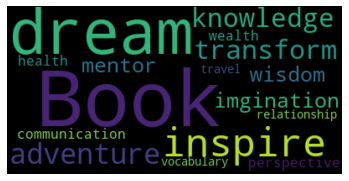

In [619]:
from wordcloud import WordCloud
# . Project Title using world cloud , because its fun!
text = 'Book  dream inspire adventure transform knowledge imgination mentor wisdom perspective health wealth communication relationship travel vocabulary'
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')# Display the generated image:
plt.axis("off")
plt.show()

# Import books review data

In [620]:
books = pd.read_csv('../data/books_desc.csv')
print( f"shape of the books is {books.shape}")
book_tags=pd.read_csv('../data/book_tags_combined.csv')
print( f"shape of the book_tags is {book_tags.shape}")
ratings = pd.read_csv("../data/ratings.csv")
print( f"shape of the ratings dataframe is {ratings.shape}")
books.head(1)

shape of the books is (10000, 27)
shape of the book_tags is (999912, 4)
shape of the ratings dataframe is (5976479, 3)


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,description,num_pages,e_book,is_ebook
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,"Could you survive on your own, in the wild, wi...",374,False,False


In [621]:
books[books['goodreads_book_id']==1]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,description,num_pages,e_book,is_ebook
26,27,1,1,41335427,275,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,...,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...,When Harry Potter and the Half-Blood Prince op...,652,False,False


In [622]:
book_tags[book_tags['goodreads_book_id'] ==1 ]

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,1,11305,37174,fantasy
2,1,11557,34173,favorites
3,1,8717,12986,currently-reading
4,1,33114,12716,young-adult
...,...,...,...,...
95,1,5444,266,bookshelf
96,1,18913,265,magical
97,1,11595,264,favs
98,1,6829,263,childhood-books


# High level glance at Data

### Data dictionary

|column   |type   | description  |
|---|---|---|
|  bookID | int64  |  book dequence identifier | 
|  title | object  |  Title of the book | 
|  authors | object  | Authors of the book  | 
|  is_ebook |  object | if the book is digital or printed  | 
|  description| object  | A short description about the book content  |  
|  language_code | object  | primary language of the book  |
| num_pages  | object  ||Number of pages the book contains   |
| ratings_count  | int64 |Total number of ratings book received   |
| text_reviews_count  | int64  |  total number of written text reviews book received | 
|average_rating |object | average rating of the book |


In [623]:
len(ratings)

5976479

In [624]:
len(ratings['user_id'].unique())

53424

In [625]:
book_tags['tag_name'].value_counts()

to-read                9983
favorites              9881
owned                  9858
books-i-own            9799
currently-reading      9776
                       ... 
Русская-литература        1
adult-plays               1
khan                      1
read-status-unknown       1
wouk-herman               1
Name: tag_name, Length: 34252, dtype: int64

In [626]:
books.dtypes

book_id                        int64
goodreads_book_id              int64
best_book_id                   int64
work_id                        int64
books_count                    int64
isbn                          object
isbn13                       float64
authors                       object
original_publication_year    float64
original_title                object
title                         object
language_code                 object
average_rating               float64
ratings_count                  int64
work_ratings_count             int64
work_text_reviews_count        int64
ratings_1                      int64
ratings_2                      int64
ratings_3                      int64
ratings_4                      int64
ratings_5                      int64
image_url                     object
small_image_url               object
description                   object
num_pages                      int64
e_book                          bool
is_ebook                      object
d

In [627]:
skip_list= ['owned','to-read','books-i-own','currently-reading','library','owned-books',
            'to-buy','default','my-books','i-own','favorites',
            'ya','re-read','j-k-rowling','kindle','ebook','wish-list','my-library',
            'to-read-fiction','didn-t-finish','library-books','read-in-english',
            'audio','audiobooks','audible','audio-book','audio-books','literature',
            'own-it','books','shelfari-favorites','have','kindle-books','on-my-shelf',
            'ebooks','e-book','e-books','paperback','books-i-have','reread','favorite-series',
            'book-club','maybe','finished','unfinished','nook','bookclub','bookshelf',
            'abandoned','did-not-finish','series','part-of-a-series','own-to-read',
            'borrowed','favourites','favorite','favorite-books','dnf','home-library',
            'read-in-2012','read-in-2013','read-in-2014','read-in-2015','read-in-2016',
            'read-2014','read-in-2011','4-stars','library-book','5-stars','need-to-buy'
            'read-2013','read-in-2017','read-2015','read-2016','tbr','unread','must-read',
            'reviewed','all-time-favorites','calibre','favorite-authors','read-2012','read-2017',
            'want-to-read','read-in-2010','school','chick-lit','american','recommended',
            'on-kindle','british','need-to-buy','2015-reads','2016-reads','2014-reads','read-2013',
            'on-hold','ya-books','my-favorites','friendship','3-stars','general','high-school',
            'shelfari-wishlist','usa','love','first-in-series','england','stand-alone','women',
            'book-club-books','coming-of-age','female-author','book-club-books','2013-reads',
            'my-bookshelf','faves','read-2011','couldn-t-finish','read-in-2009','middle-grade',
            'gave-up-on','personal-library','mine','want','ya-lit','overdrive','other','to-re-read',
            'arc','dark','book-group','europe','sff','middle-school','2016-books','read-for-school',
            'hardcover','sf','21st-century','female-authors','2015-books','2015-books','lit','first-reads',
            'short-stories','favourite','inspirational','college','favs','for-school','never-finished',
            'in-my-library','america','1','reference','2014-books','5-star','epic','collection',
            'books-to-buy','2012-reads','school-books','book-boyfriends','book-club-reads','on-my-bookshelf',
            'chicklit','to-get','2016-read','2016-reading-challenge','uk','2017-reads',
            'read-more-than-once','bought','to-read-own','2006','loved','owned-to-read','1001-books',
            'classroom-library','1001','pnr','1001-books-to-read-before-you-die','2015-reading-challenge',
            'translated','gave-up','want-to-buy','made-me-cry','purchased','books-owned','audiobook','english'
           ]
#set(book_tags[~(book_tags['tag_name'].isin(skip_list))]['tag_name'].to_list())


In [628]:
# Get names of indexes for which column Age has value 30
indexNames = book_tags[ book_tags['tag_name'].isin(skip_list)].index
 
# Delete these row indexes from dataFrame
book_tags.drop(indexNames , inplace=True)

### Average length of books?

 confirming we have no  Nans 0
** we have books with zeros pages 1910


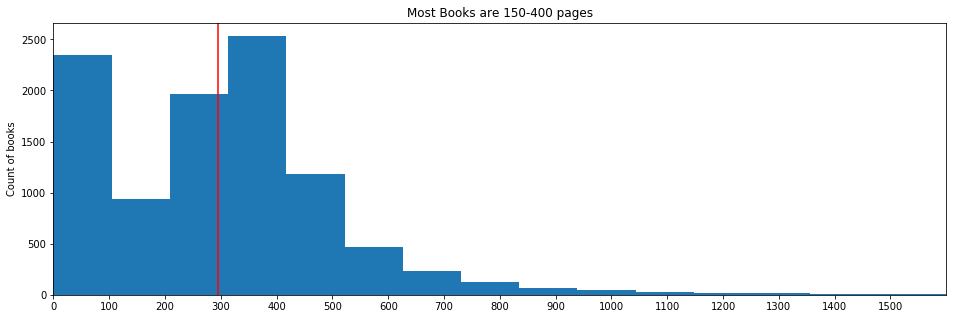

In [629]:
print(f" confirming we have no  Nans {books['average_rating'].isnull().sum()}")
print(f"** we have books with zeros pages {len(books[books['num_pages'] ==0])}")
def plot_distribution(column, title,xlabel,xstart,x_end,stepsize, bins =50):
    plt.figure(figsize=(16,5))
    plt.hist(books[column], bins)
    plt.gca().set(title='Most Books are 150-400 pages', ylabel='Count of books');
    plt.xlim(xstart,x_end)
    plt.xticks(np.arange(xstart, x_end, step=stepsize));
    plt.axvline(books['num_pages'].mean(), color='r',label ="average length")
plot_distribution('num_pages',"length in pages",'Average lenth of a book is around 350 pages',0,1600,100)

In [630]:
layout = go.Layout(title="Distribution Number of pages for the books" , 
                   xaxis=dict(title="" ), 
                   yaxis=dict(title="Number of pages" )) 
fig = go.Figure(layout=layout)
# Use x instead of y argument for horizontal plot
fig.add_trace(go.Box(y=books['num_pages'],name='books')) #,boxmean='sd'
fig.show();

### Do we have enough book ratings?

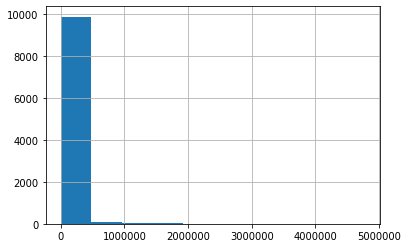

In [631]:
books['ratings_count'].hist()

In [632]:
def rating_category(ratings_count):
    if ratings_count <10 :
        return('<10')
    elif ratings_count < 100:
        return('11-100')
    elif ratings_count <= 1000:
        return('101-1000')
    else:
         return('>1000')
books['ratings_weight'] =books['ratings_count'].map(rating_category)
books['ratings_weight'].value_counts()

>1000    10000
Name: ratings_weight, dtype: int64

Text(0.5, 1.0, 'Do we have enough people rate the books ?')

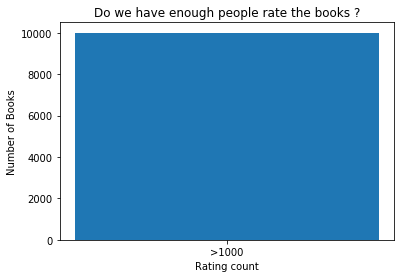

In [633]:
plt.bar(books['ratings_weight'].value_counts().index,books['ratings_weight'].value_counts())
plt.xlabel("Rating count")
plt.ylabel("Number of Books")
plt.title("Do we have enough people rate the books ?")

### Average rating for the books

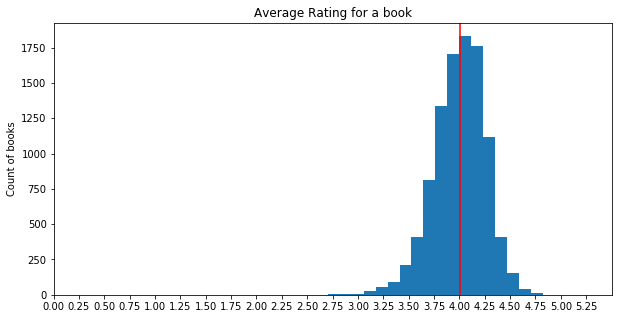

In [634]:
plt.figure(figsize=(10,5))
plt.hist(books['average_rating'], 20)
plt.gca().set(title='Average Rating for a book', ylabel='Count of books');
plt.xlim(0,5.5)
plt.xticks(np.arange(0, 5.5, step=0.25));
plt.axvline(books['average_rating'].mean(), color='r',label ="average length")

In [635]:
data=go.Scatter(x=books['ratings_count'] , # x data
                y=books['average_rating'] , # y data
                mode='markers' , # drawing mode for scatter trace
                #marker_color=books['title'] , # color by population
                marker_size= 12, # size of markers
                text=books['title'] ) # hover text goes here
layout = go.Layout(title ='Do People tend to rate book when they like book than when they dont?',
                   xaxis =dict(title='number of reviewers'),
                   yaxis =dict(title='overall rating'))
fig = go.Figure(data=data, layout=layout)
fig.show()

### TOP 10 books highly rated books

In [636]:
top_20_highly_rated= books[['title','ratings_count','average_rating']].sort_values('ratings_count',ascending=False).head(20)

import plotly.express as px
fig = px.bar(top_20_highly_rated, x='title', y='ratings_count',text='ratings_count',
             hover_data=['average_rating'], color="average_rating",
             color_continuous_scale=px.colors.diverging.Armyrose,
             color_continuous_midpoint=books['average_rating'].mean(),
             labels={'ratings_count':'Ratings received', 'title' : ''}, height=600)
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',title_text='Top 20 higest rated books')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

In [637]:
###### Consolidate all Audio tags under same category
def consolidate_tags(tag_lst,target_tag):
    target_tag_id = book_tags[book_tags['tag_name']==target_tag]['tag_id'].values[0]  
    l= book_tags[(book_tags['tag_name'].isin(tag_lst))]['tag_name'].to_list()
    print(f"replacing {len(l)} tags with {target_tag}, tag_id= {target_tag_id}")
    book_tags['tag_name']= book_tags['tag_name'].apply(lambda x : target_tag if x in tag_lst else x)
    book_tags.loc[book_tags['tag_name'] ==target_tag,'tag_id']= target_tag_id 
consolidate_tags(['general-fiction'],'fiction')
consolidate_tags(['sci-fi-fantasy','scifi-fantasy'],'fantasy-sci-fi')
consolidate_tags(['novel'],'novels')
#consolidate_tags(['20th-century'],'history')
consolidate_tags(['20th-century'],'history')
#consolidate_tags(['suspense'],'mystery')
consolidate_tags(['classic'],'classics')
consolidate_tags(['mystery','thriller'],'mystery-thriller')
consolidate_tags(['paranormal'],'supernatural')
consolidate_tags(['science-fiction'],'sci-fi')
consolidate_tags(['funny'],'humor')

replacing 2974 tags with fiction, tag_id= 11743
replacing 4087 tags with fantasy-sci-fi, tag_id= 11370
replacing 4084 tags with novels, tag_id= 22034
replacing 1964 tags with history, tag_id= 14552
replacing 1939 tags with classics, tag_id= 7457
replacing 6208 tags with mystery-thriller, tag_id= 20994
replacing 1941 tags with supernatural, tag_id= 29011
replacing 2222 tags with sci-fi, tag_id= 26771
replacing 1675 tags with humor, tag_id= 15048


In [639]:
##### Consolidate all childrens books under same category
tag_lst= book_tags[(book_tags['tag_name'].str.contains('children')) ]['tag_name'].to_list()
#consolidate_tags(['childhood-reads','kids','kids-books','childhood-books','childhood','childhood-favorites'],'childrens')
#consolidate_tags(list(set(tag_lst)),'childrens')



#tag_lst = book_tags[(book_tags['tag_name'].str.contains('history'))]['tag_name'].to_list()
#consolidate_tags(set(['war'] +tag_lst),'history')

#suspense
consolidate_tags(['suspense-thriller','thriller-mystery','thriller-suspense','mystery-thrillers','epic-fantasy','mystery-suspense-thriller','mystery-thriller-suspense'],'mystery-thriller')
#tag_lst= book_tags[(book_tags['tag_name'].str.contains('mystery'))]['tag_name'].to_list()
#consolidate_tags(tag_lst,'mystery-thriller')


tag_lst=set(book_tags[(book_tags['tag_name'].str.contains('novel'))]['tag_name'].to_list())
consolidate_tags(tag_lst,'novels')

tag_lst=set(book_tags[(book_tags['tag_name'].str.contains('memoir'))]['tag_name'].to_list())
consolidate_tags(tag_lst,'biography')

## Fiction
consolidate_tags(['teen','juvenile','youth','new-adult'],'young-adult')
consolidate_tags(['general-fiction','speculative-fiction','magic','literary-fiction','contemporary-fiction','modern-fiction','vampires','vampire','fiction-to-read'],'fiction')
consolidate_tags(['ya-fiction','harry-potter'],'fiction') 
#consolidate_tags(['sci-fi','scifi'],'science-fiction')
consolidate_tags(['teen-fiction','juvenile-fiction'],'young-adult-fiction')


consolidate_tags(['paranormal','paranormal-romance','paranormal-fantasy','fantasy-paranormal'],'supernatural') 

#consolidate_tags(['fantasy-sci-fi,sci-fi-fantasy','science-fiction-fantasy','fantasy-scifi','sci-fi-and-fantasy'],'scifi-fantasy') 
consolidate_tags(['urban-fantasy','ya-fantasy','high-fantasy','sf-fantasy','guilty-pleasures'],'fantasy')

consolidate_tags(['funny','humour','comedy','humorous'],'humor') 
consolidate_tags(['20th-century','19th-century','historicals'],'historical') 
 
consolidate_tags(['non-fiction','to-read-nonfiction','non-fic','nonfiction-to-read'],'nonfiction') 
consolidate_tags(['to-read-non-fiction','non-fiction-to-read'],'nonfiction') 





consolidate_tags(['contemporary-romance'],'romance')
consolidate_tags(['urban-fantasy','ya-fantasy'],'fantasy')



consolidate_tags(['classic','literature','literary','classics','american-lit','american-literature','british-literature','chic-lit','kid-lit','chicklit','to-read-classics'],'classic-literature') 
consolidate_tags(['dystopia'],'dystopian')



consolidate_tags(['realistic'],'realistic-fiction')
consolidate_tags(['erotica','erotic'],'adult-romance')
consolidate_tags(['modern'],'contemporary')


replacing 0 tags with mystery-thriller, tag_id= 20994
replacing 17926 tags with novels, tag_id= 22034
replacing 0 tags with biography, tag_id= 4605
replacing 0 tags with young-adult, tag_id= 33114
replacing 0 tags with fiction, tag_id= 11743
replacing 0 tags with fiction, tag_id= 11743
replacing 0 tags with young-adult-fiction, tag_id= 33124
replacing 0 tags with supernatural, tag_id= 29011
replacing 0 tags with fantasy, tag_id= 11305
replacing 0 tags with humor, tag_id= 15048
replacing 0 tags with historical, tag_id= 14467
replacing 0 tags with nonfiction, tag_id= 21773
replacing 0 tags with nonfiction, tag_id= 21773
replacing 1105 tags with romance, tag_id= 26138
replacing 0 tags with fantasy, tag_id= 11305
replacing 9724 tags with classic-literature, tag_id= 7423
replacing 718 tags with dystopian, tag_id= 10064
replacing 536 tags with realistic-fiction, tag_id= 25438
replacing 973 tags with adult-romance, tag_id= 1679
replacing 508 tags with contemporary, tag_id= 8055


In [640]:
book_tags['tag_name'].value_counts().head(30)

fiction                23754
novels                 17926
mystery-thriller       12764
classic-literature     10476
fantasy                 8801
young-adult             8037
nonfiction              7438
biography               7013
humor                   6644
adult                   6604
fantasy-sci-fi          6078
supernatural            5909
contemporary            5795
romance                 5356
adult-fiction           4775
sci-fi                  4449
history                 4102
adventure               3661
historical              3087
drama                   3046
young-adult-fiction     2763
historical-fiction      2590
suspense                2419
realistic-fiction       2349
action                  2172
family                  2160
crime                   2083
mystery-suspense        1560
adult-romance           1492
dystopian               1473
Name: tag_name, dtype: int64

In [641]:


goodreads_book_id_genre_list = book_tags[book_tags['tag_name'] == 'romance']['goodreads_book_id'].to_list()
df =books[books['goodreads_book_id'].isin(goodreads_book_id_genre_list)]
top_5_highly_rated_romance= df[['title','ratings_count','average_rating']].sort_values('ratings_count',ascending=False).head(5)

goodreads_book_id_genre_list = book_tags[book_tags['tag_name'] == 'mystery-thriller']['goodreads_book_id'].to_list()
df =books[books['goodreads_book_id'].isin(goodreads_book_id_genre_list)]
top_5_highly_rated_mt= df[['title','ratings_count','average_rating']].sort_values('ratings_count',ascending=False).head(5)

goodreads_book_id_genre_list = book_tags[book_tags['tag_name'] == 'fantasy-sci-fi']['goodreads_book_id'].to_list()
df =books[books['goodreads_book_id'].isin(goodreads_book_id_genre_list)]
top_5_highly_rated_fsf= df[['title','ratings_count','average_rating']].sort_values('ratings_count',ascending=False).head(5)


goodreads_book_id_genre_list = book_tags[book_tags['tag_name'] == 'nonfiction']['goodreads_book_id'].to_list()
df =books[books['goodreads_book_id'].isin(goodreads_book_id_genre_list)]
top_5_highly_rated_nf= df[['title','ratings_count','average_rating']].sort_values('ratings_count',ascending=False).head(5)


In [642]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=1, start_cell="bottom-left",
                   subplot_titles=("romance","nonfiction", "fantasy-sci-fi"))

fig.add_trace(go.Bar(y=top_5_highly_rated_romance['title'], x=top_5_highly_rated_romance['ratings_count'],orientation ='h'),
              1, 1)


fig.add_trace(go.Bar(y=top_5_highly_rated_nf['title'], x=top_5_highly_rated_nf['ratings_count'],orientation ='h'),
              row=2, col=1)


fig.add_trace(go.Bar(y=top_5_highly_rated_fsf['title'], x=top_5_highly_rated_fsf['ratings_count'],orientation ='h'), 
              row=3, col=1)



fig.show()

###  Best Rated books about COVID-19

In [643]:
covid_19_df = pd.read_csv("../data/covid_19_books_desc.csv")
covid_19_df.isna().sum()

authors               0
average_rating        0
description          50
goodreads_book_id     0
is_ebook              0
language_code        61
num_pages             0
ratings_count         0
title                 0
dtype: int64

In [645]:
len(((covid_19_df['average_rating'] >=4.0) & (covid_19_df['ratings_count'] >=100)))

79

In [646]:


top_5_highly_rated_covid= covid_19_df[['title','ratings_count','average_rating']].sort_values('ratings_count',ascending=False).head(10)

import plotly.express as px
fig = px.bar(top_5_highly_rated_covid, y='title', x='average_rating',text='ratings_count',orientation ='h',
             hover_data=['average_rating'],width =1000,title='TOP 10 covid-19 books for you',
             labels={'ratings_count':'Ratings received', 'title' : ''})

fig.show()

In [647]:
books.to_csv("../data/cleaned_books.csv", index=False)

### Summary
We have around 13719 book reviews, from  7605 different authors.
1.We looked at the data to drop reduendent columns like , ISB13  and book ID, renamed. columns for consitency.
2. Number of Pages :
we have around 0.6% books with no book length.Most of the books were  196 to 421 pages.
The publishing industry doesn’t measure “books” in pages, but in word-count, 
in which case 50,000 is minimum requirement for a book with is 20 pages or so.
we should create feature with  4 categories for length of books
book_length   
 *0-20 - unknown,
 
 *21-195 - small
 
 *196 -420 - regular
 
 *421- 758 large
 
 *>758 - huge

3. Count of ratings
  rating bins?
3. Authors

### References

https://www.kaggle.com/jealousleopard/goodreadsbooks

https://www.kaggle.com/qwp8510/analyze-goodread-book-beginner-eda

install the Table of contents extension: https://github.com/minrk/ipython_extensions

#TODO :scraping Genre. for all the books ?

##Which genre is most represented in the Top 400 list?
   ##What is the distribution of each genre within the Top 400 list
   
inspiration :https://towardsdatascience.com/how-to-make-goodreads-com-top-400-list-8e3a26e509bf